<a href="https://colab.research.google.com/github/bhargavakula01/image-classification-program/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.layers.core import Activation
from keras.optimizers import SGD #Backwards propagation method (similar to gradient decent)
from keras.utils import np_utils
from keras.datasets import mnist #bunch of handwritten digits :)
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading data from the keras datasets and splitting it into training and validation
# https://stackoverflow.com/questions/48566821/is-there-a-keras-method-to-split-data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#plt.imshow(x_train[0], cmap= 'grey) <-- allows one to view the images

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("previous x_train shape:",x_train.shape) #60000 data points
print("previous x_test shape:",x_test.shape) #10000 data points

# data must be reshaped in order to get it to (n, xi) format 
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
#converting data type to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


previous x_train shape: (60000, 28, 28)
previous x_test shape: (10000, 28, 28)


In [ ]:
#normalizing the data <-- basically making the pixel values between 0 and 1
  # normalizing data in math is setting lengths to 1. In resizing data, this usually means to set the data values between 0 and 1 
  #(https://www.calculushowto.com/types-of-functions/normalized-function-normalized-data-and-normalization/)

x_train /= 255
x_test /= 255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#splitting y_train and y_test into catagories(1 category for each number)

y_var_train = np_utils.to_categorical(y_train, 10)
y_var_test = np_utils.to_categorical(y_test, 10)


Epoch 1/100
114/114 - 1s - loss: 2.2204 - accuracy: 0.1889 - val_loss: 2.0801 - val_accuracy: 0.3197
Epoch 2/100
114/114 - 0s - loss: 1.9922 - accuracy: 0.3209 - val_loss: 1.7839 - val_accuracy: 0.4510
Epoch 3/100
114/114 - 0s - loss: 1.7509 - accuracy: 0.4141 - val_loss: 1.5113 - val_accuracy: 0.5593
Epoch 4/100
114/114 - 0s - loss: 1.5572 - accuracy: 0.4730 - val_loss: 1.3116 - val_accuracy: 0.6047
Epoch 5/100
114/114 - 0s - loss: 1.4058 - accuracy: 0.5185 - val_loss: 1.1569 - val_accuracy: 0.6507
Epoch 6/100
114/114 - 0s - loss: 1.2806 - accuracy: 0.5731 - val_loss: 1.0249 - val_accuracy: 0.7253
Epoch 7/100
114/114 - 0s - loss: 1.1693 - accuracy: 0.6279 - val_loss: 0.9059 - val_accuracy: 0.7597
Epoch 8/100
114/114 - 0s - loss: 1.0728 - accuracy: 0.6640 - val_loss: 0.8066 - val_accuracy: 0.7840
Epoch 9/100
114/114 - 0s - loss: 0.9923 - accuracy: 0.6821 - val_loss: 0.7264 - val_accuracy: 0.7993
Epoch 10/100
114/114 - 0s - loss: 0.9266 - accuracy: 0.7017 - val_loss: 0.6645 - val_accura

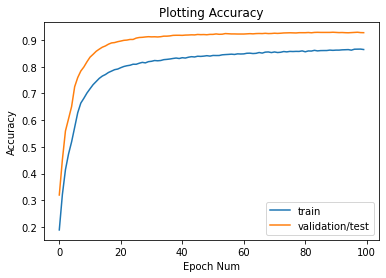

In [8]:
#developing model
image_model = Sequential()
image_model.add(Dense(10, input_shape= (784,)))
image_model.add(Dropout(rate= 0.2))
image_model.add(Dense(10, activation= 'relu'))
image_model.add(Dense(10, activation= 'softmax'))

image_model.compile(optimizer= SGD(), loss='categorical_crossentropy',  metrics= ['accuracy'])
dlmodel =image_model.fit(x_train, y_var_train, epochs= 100, batch_size= 500, verbose= 2, validation_split=0.05)

plt.plot(dlmodel.history['accuracy'], label= 'train')
plt.plot(dlmodel.history['val_accuracy'], label= 'validation/test')
plt.title('Plotting Accuracy')
plt.xlabel('Epoch Num')
plt.ylabel('Accuracy')
plt.legend(loc= 'lower right')
plt.show()

In [10]:
#Printing the accuracy of the model
overall_acc = image_model.evaluate(x_test, y_var_test, verbose= 0)
print('Test Accuracy:', overall_acc[1])

Test Accuracy: 0.9070000052452087
